In [1]:
%matplotlib inline

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# Test with Cassandra on GCP with 60-day time clustering

JIRA ticket: https://jira.lsstcorp.org/browse/DM-28467


In [2]:
data_files = [
    "data/DM-28467/apdb-gcp-5-20210123T041019.csv.gz",
    "data/DM-28467/apdb-gcp-5-20210123T131652.csv.gz",
    "data/DM-28467/apdb-gcp-5-20210123T234728.csv.gz",
    "data/DM-28467/apdb-gcp-5-20210124T022426.csv.gz",
    "data/DM-28467/apdb-gcp-5-20210124T130436.csv.gz",
    "data/DM-28467/apdb-gcp-5-20210125T003017.csv.gz",
    "data/DM-28467/apdb-gcp-5-20210125T122137.csv.gz",
]

In [3]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]

In [4]:
df_cass = pd.concat(frames)
del frames
# strip visits that did not measure read time
df_cass = df_cass[(df_cass.index % 1000) < 100]

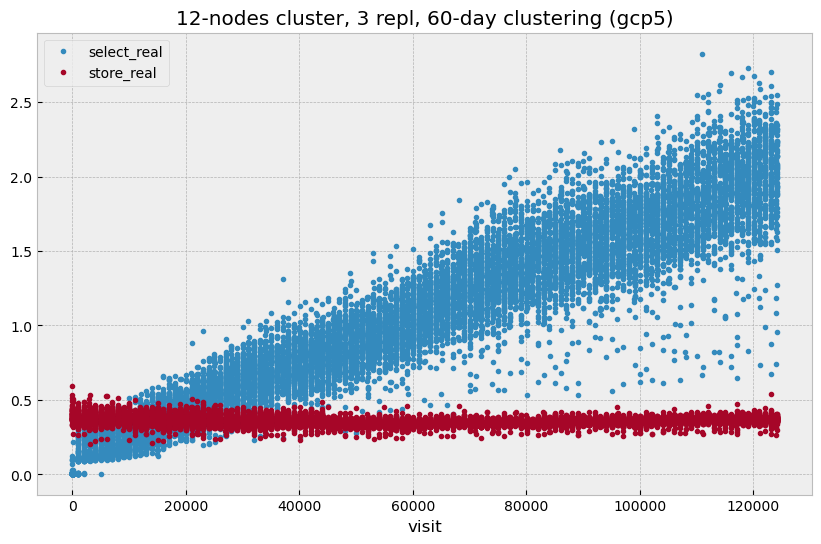

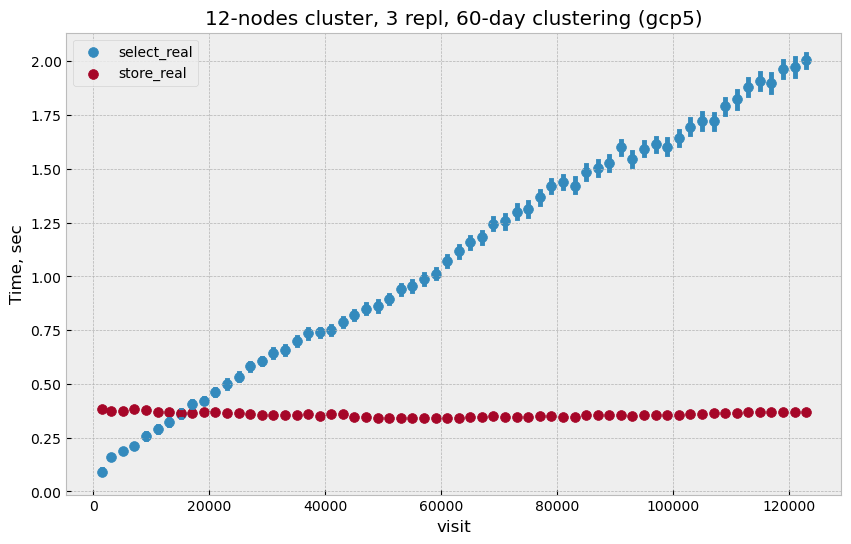

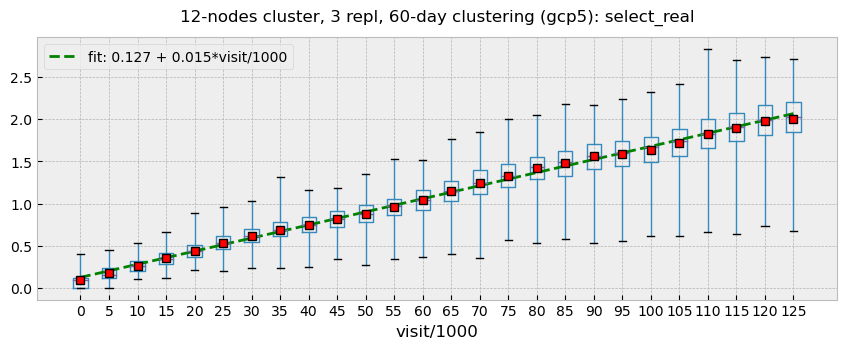

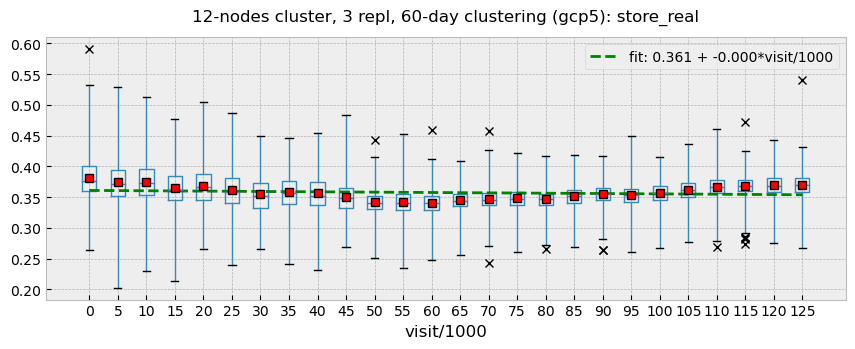

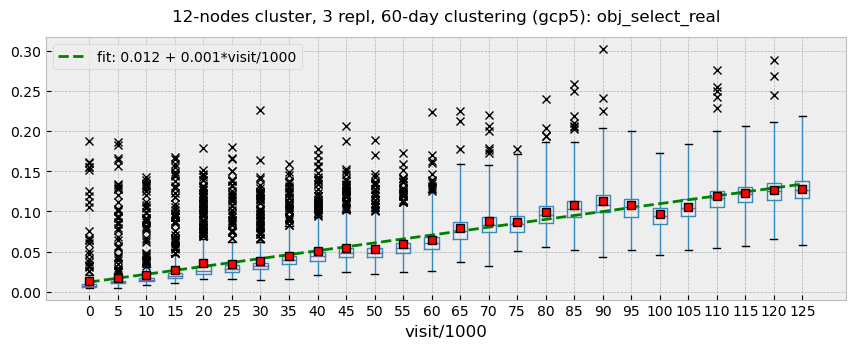

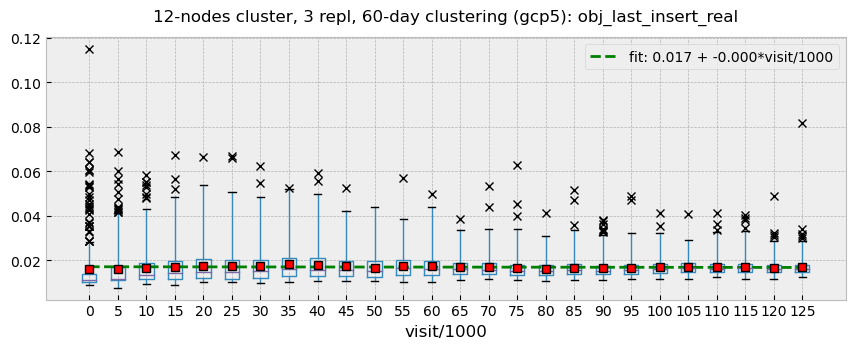

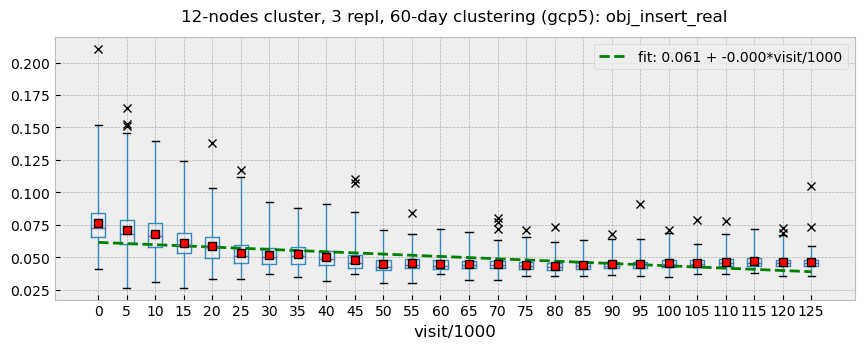

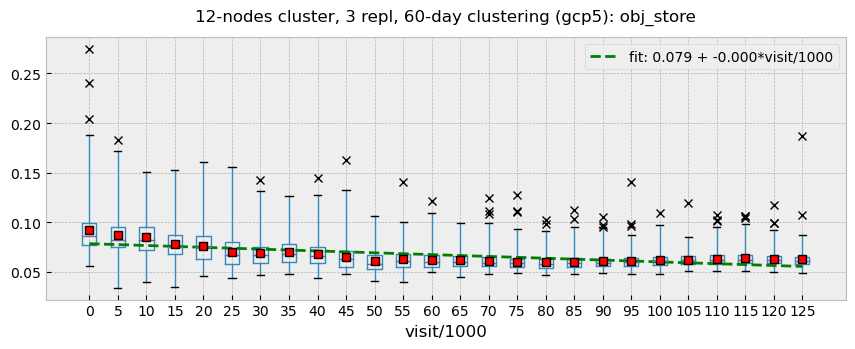

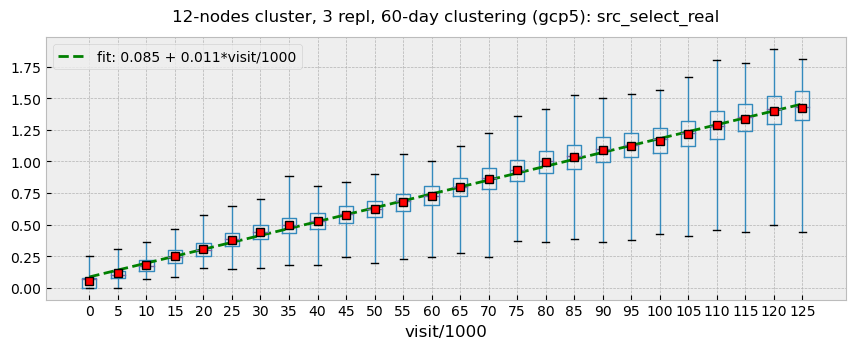

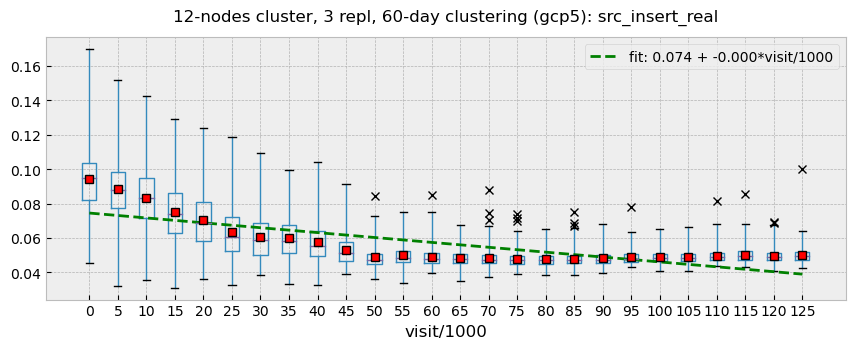

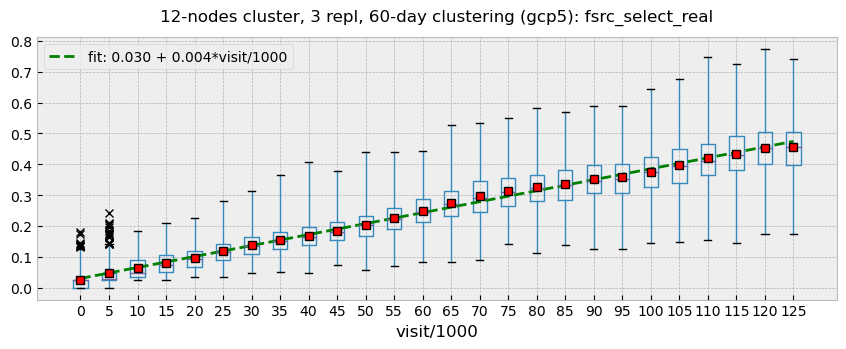

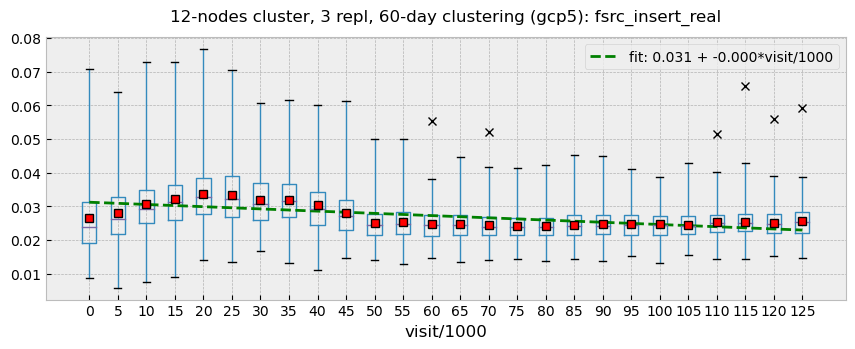

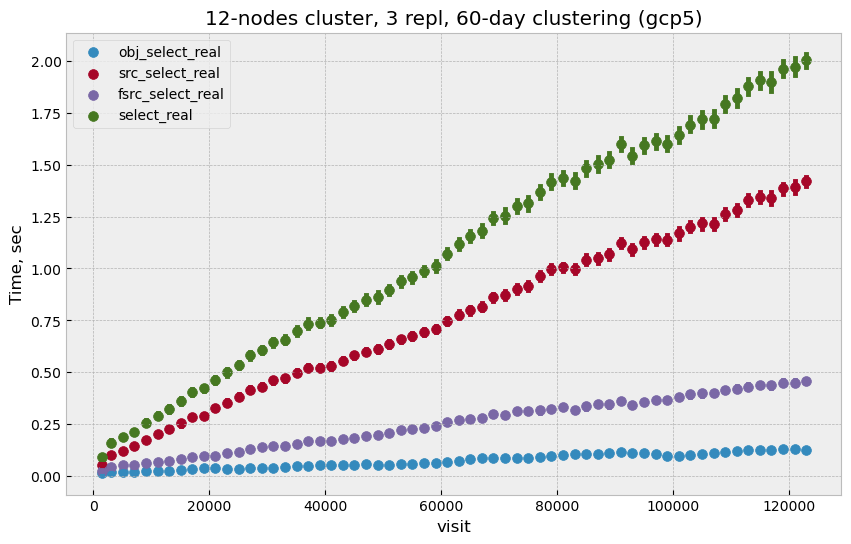

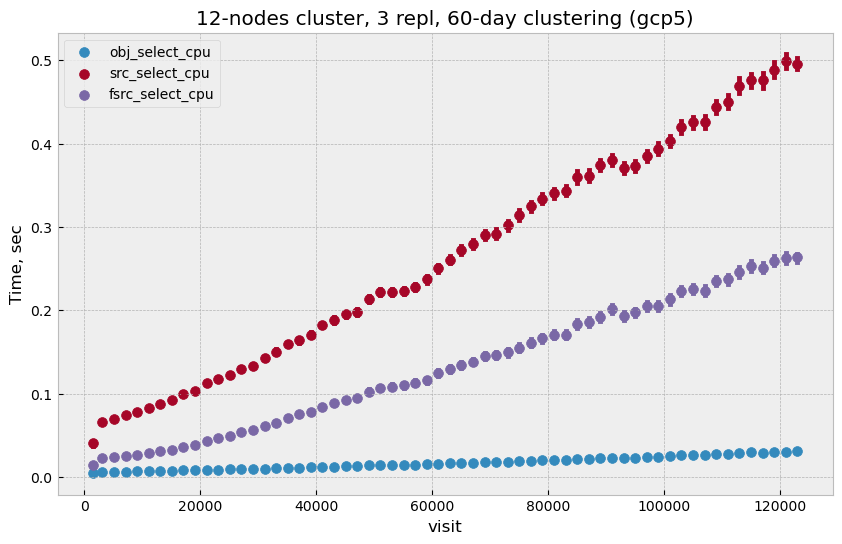

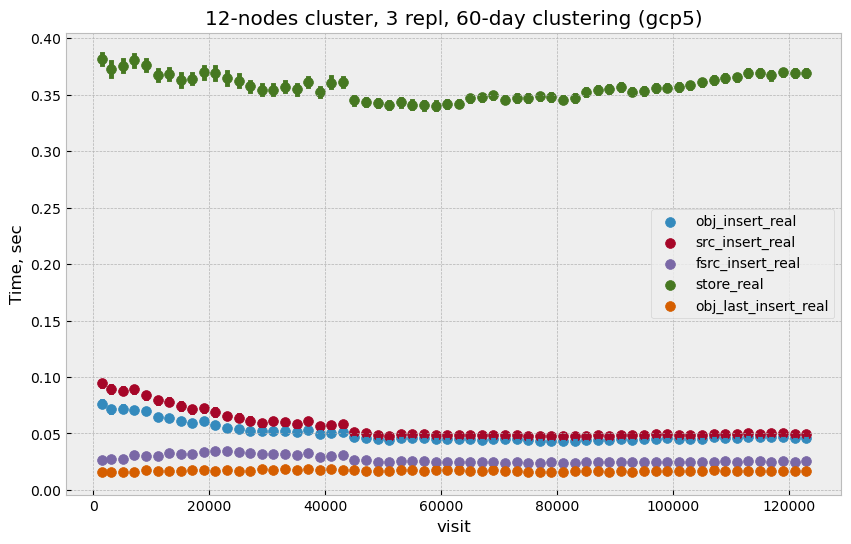

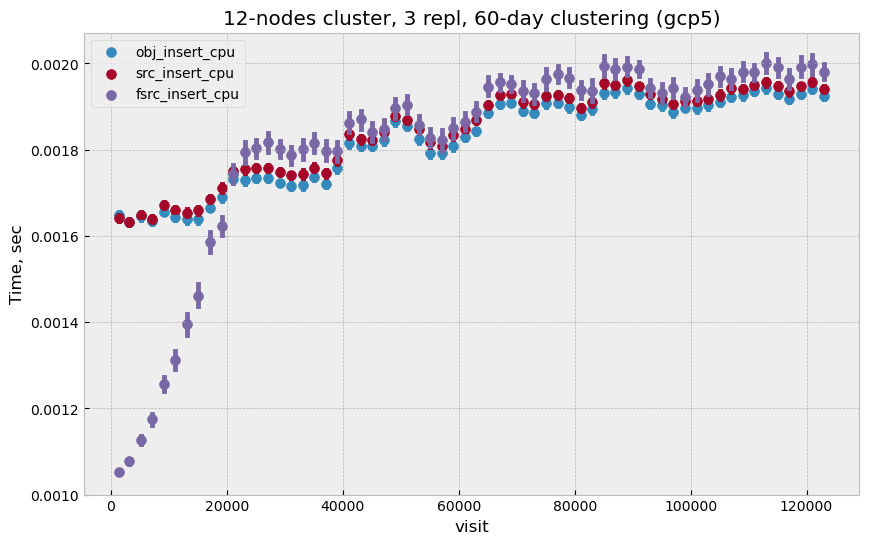

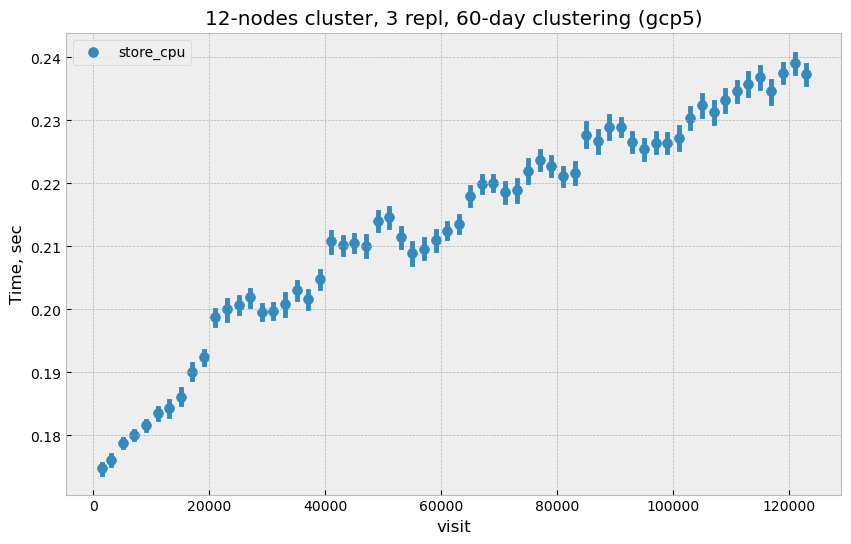

In [7]:
# fit_modes = dict(
#     store_real=None,
#     obj_last_insert_real=None,
#     src_insert_real=None,
#     fsrc_insert_real=None,
#     obj_insert_real=None,
#     src_insert_cpu=None,
#     fsrc_insert_cpu=None,
#     obj_insert_cpu=None,
#     store_cpu=None,
# )

title = "12-nodes cluster, 3 repl, 60-day clustering (gcp5)"
plots.do_plots_all(df_cass, title, bin=5000, plots=all_plots, whis=whiskers, fit_mode=None, fit_nbins=62);

### Fit for first 100k visits

To compare to previous tests

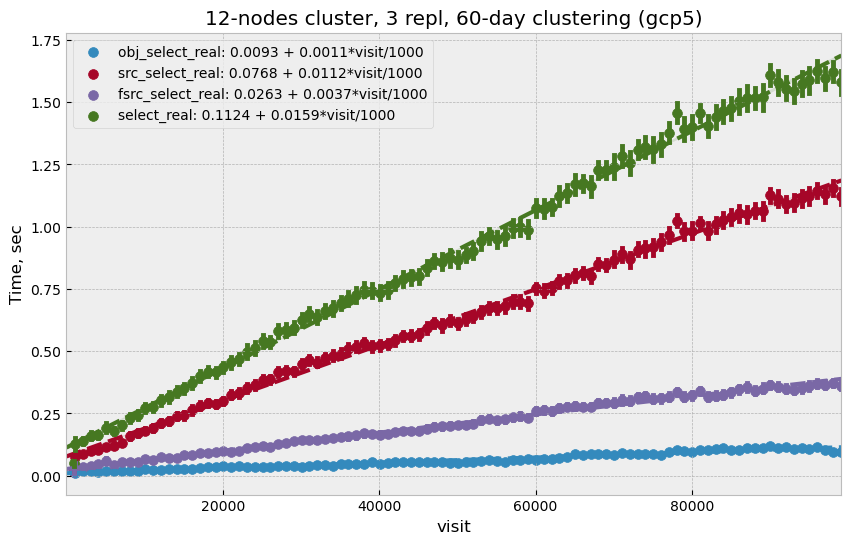

In [11]:
cols = ['obj_select_real', 'src_select_real', 'fsrc_select_real', 'select_real']
plots.plot_fit_times(df_cass[:9999], cols, fit_mode="poly", nbins=100, title=title);